In [1]:
# jupyter nbconvert --to python test_software_dev_version.ipynb test_software_dev_version.py
%reset -f
import importlib
import numpy as np
import os 
import sys
import pickle
import time

import matplotlib
import matplotlib.pyplot as plt

import Alpaga # the full package
from Alpaga import shs_module
from Alpaga.Data_tutorial import get_tutorial_path 


# Load the treated files for water in SHS

In [2]:
directory = get_tutorial_path("SHS")
name_save_result = os.path.join(directory, 'shs_water_pola_V.p')

with open(name_save_result, "rb") as filetoload:
    L_post_prod_load = pickle.load(filetoload)

L_files_angles = L_post_prod_load['L_files_angles']

L_files_angles_new = []
for k in range(0, len(L_files_angles), 1):
    L_files_angles_new.append(float(L_files_angles[k]))
L_polarisation_angle = np.array(L_files_angles_new)*2

L_intensity = L_post_prod_load['L_intensity']
L_intensity_error = L_post_prod_load['L_intensity_error']
L_lambda_0 = L_post_prod_load['L_lambda_0']
L_lambda_0_error = L_post_prod_load['L_lambda_0_error']
L_waist = L_post_prod_load['L_waist']
L_waist_error = L_post_prod_load['L_waist_error']
L_intensity_fit_gauss_fixed_para = L_post_prod_load['L_intensity_fit_gauss_fixed_para']
L_intensity_fit_gauss_fixed_para_error = L_post_prod_load['L_intensity_fit_gauss_fixed_para_error']
L_intensity_integral_gauss_fixed_para = L_post_prod_load['L_intensity_integral_gauss_fixed_para']
L_intensity_integral_gauss_fixed_para_error = L_post_prod_load['L_intensity_integral_gauss_fixed_para_error']



/home/glebreton/.local/lib/python3.7/site-packages/Alpaga/Data_tutorial/SHS/shs_water_pola_V.p


Text(0.5, 1.0, 'Extracted gaussian intensity with respect to the method used')

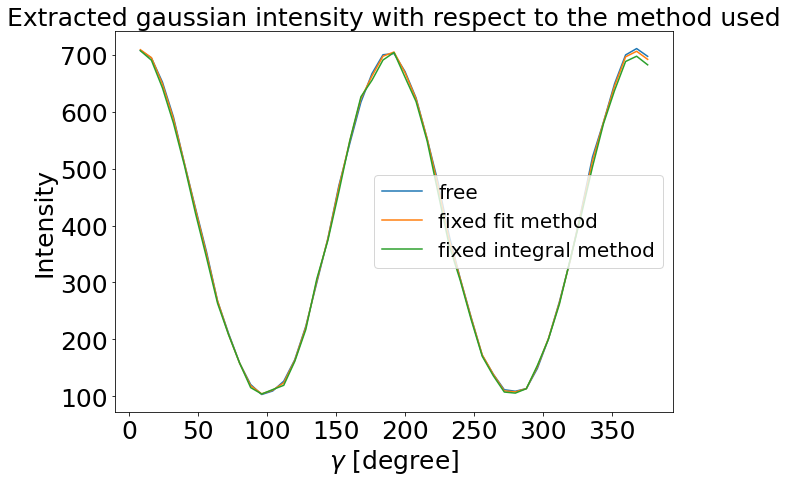

In [3]:
plt.figure(1, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity, label='free')
plt.plot(L_polarisation_angle, L_intensity_fit_gauss_fixed_para, label='fixed fit method')
plt.plot(L_polarisation_angle, L_intensity_integral_gauss_fixed_para, label='fixed integral method')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Extracted gaussian intensity with respect to the method used', fontsize=25)

Text(0.5, 1.0, 'Incertitude relative')

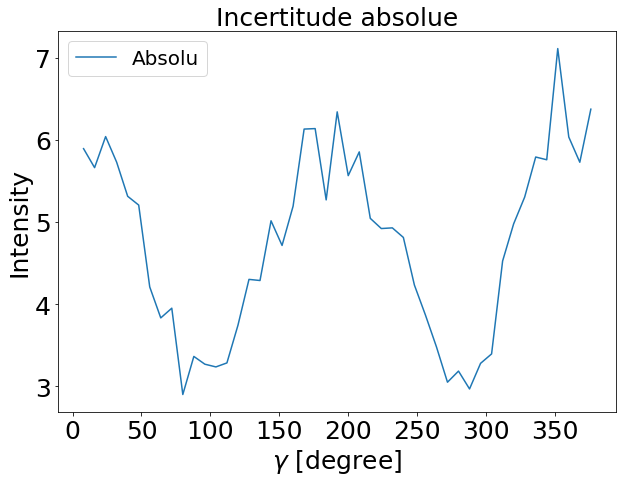

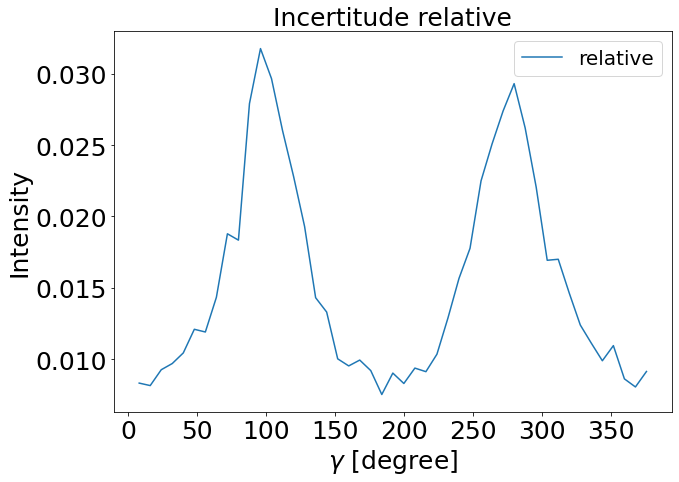

In [4]:
#Incertitude Intensity
plt.figure(1, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity_error, label='Absolu')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Incertitude absolue', fontsize=25)


plt.figure(2, figsize=(10, 7))
plt.plot(L_polarisation_angle, L_intensity_error/L_intensity, label='relative')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Incertitude relative', fontsize=25)

Text(0.5, 1.0, 'Intensity with error')

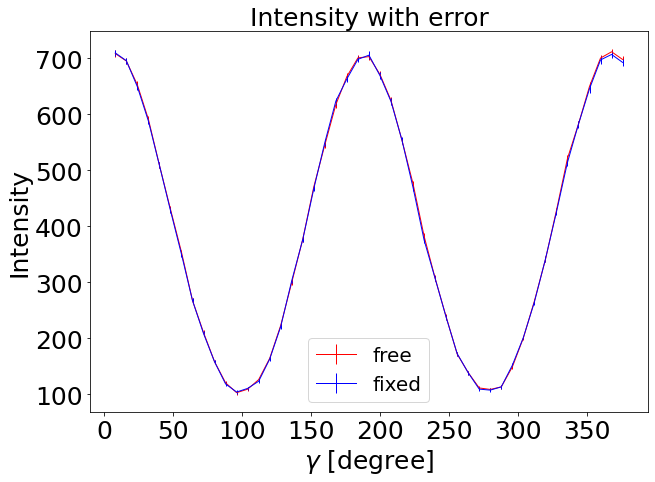

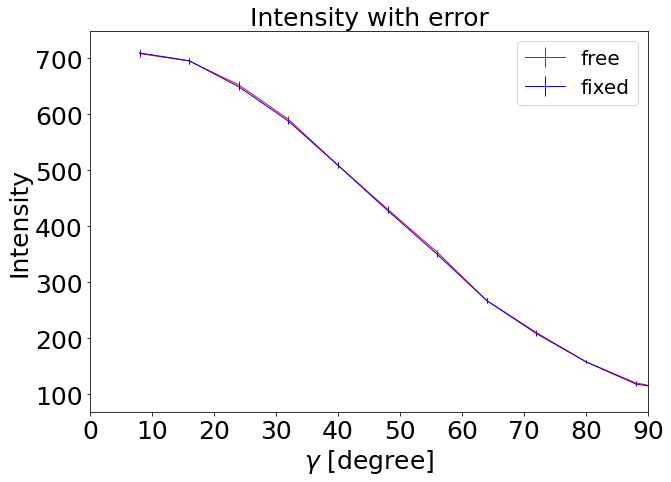

In [5]:
plt.figure(1, figsize=(10, 7))
plt.errorbar(L_polarisation_angle, L_intensity, yerr=L_intensity_error, label='free', fmt = 'r', marker='s', mfc='r',
          ms=0, mew=1, linewidth=1) 
plt.errorbar(L_polarisation_angle, L_intensity_fit_gauss_fixed_para, yerr=L_intensity_fit_gauss_fixed_para_error, label='fixed', fmt = 'b', marker='o', mfc='b',
          ms=0, mew=1, linewidth=1) 
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.title('Intensity with error', fontsize=25)

plt.figure(2, figsize=(10, 7))
plt.errorbar(L_polarisation_angle, L_intensity, yerr=L_intensity_error, label='free', fmt = 'r', marker='s', mfc='r',
          ms=0, mew=1, linewidth=1) 
plt.errorbar(L_polarisation_angle, L_intensity_fit_gauss_fixed_para, yerr=L_intensity_fit_gauss_fixed_para_error, label='fixed', fmt = 'b', marker='o', mfc='b',
          ms=0, mew=1, linewidth=1) 
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
plt.xlim([0, 90])
plt.title('Intensity with error', fontsize=25)


# Compute properties

## Polar plot

a= 706.292230409337 b= 686.8871405817122 c= 104.36976003114427 alpha_0= 8.339654520935891
ZetaV = -0.18019677840226622 D = 0.14777135516648116
i0= 389.65035296199596 i2= 300.5504463695141 i4= 15.080934022025597


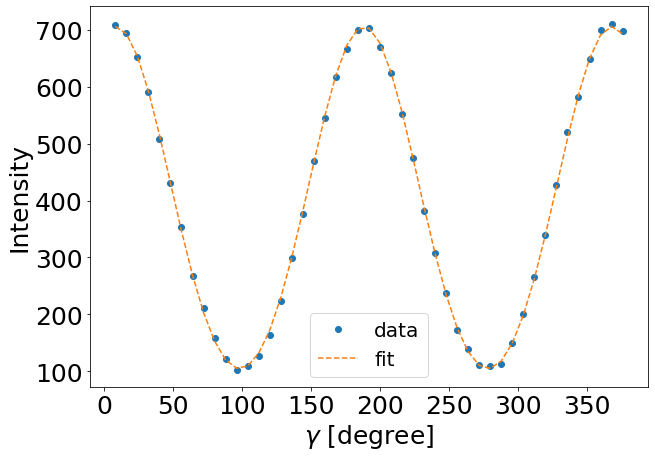

In [7]:
L_x = L_polarisation_angle
T = 1 # Acquisition time if you want to renormalize
L_y = L_intensity/T # chose which method you want to have the intensity

L_SHS_prop, L_SHS_prop_error = Alpaga.shs_module.analyse_polarization_SHS_V(L_x, L_y)
a, b, c, ZetaV, Depol, i0, i2, i4, alpha_0 = L_SHS_prop


print('a=', a, 'b=' ,b, 'c=', c, 'alpha_0=', alpha_0)
print('ZetaV = ' + str(ZetaV), 'D = ' + str(Depol))
print('i0=', i0, 'i2=', i2, 'i4=', i4)

plt.figure(1, figsize=(10, 7))
plt.plot(L_x, L_y , 'o', label='data')
plt.plot(L_x, Alpaga.shs_module.fct_polar_abc(L_x, a, b, c, alpha_0), '--', label='fit')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)

textstr = '\n'.join((
    r'D=%.3f' % (Depol, ),
    r'ZetaV=%.3f' % (ZetaV, ),
    r'i4=%.3f' % (i4, )))
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='none', alpha=0.2)


## i4

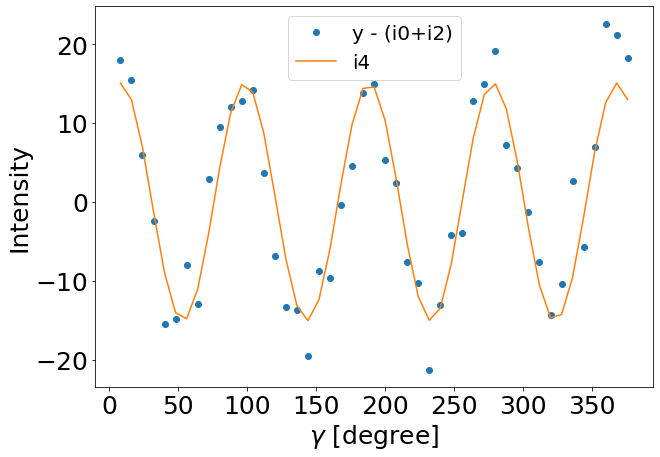

In [8]:
plt.figure(2, figsize=(10, 7))
#plt.plot(L_x, L_y/i0 - 1 , 'o', label='y - 1')
plt.plot(L_x, L_y - (i0+i2*np.cos(2*np.pi/180*(L_x-alpha_0))) , 'o', label='y - (i0+i2)')
plt.plot(L_x, i4*np.cos(4*np.pi/180*(L_x-alpha_0)) , label='i4')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
#plt.title(name_for_title, fontsize=25)

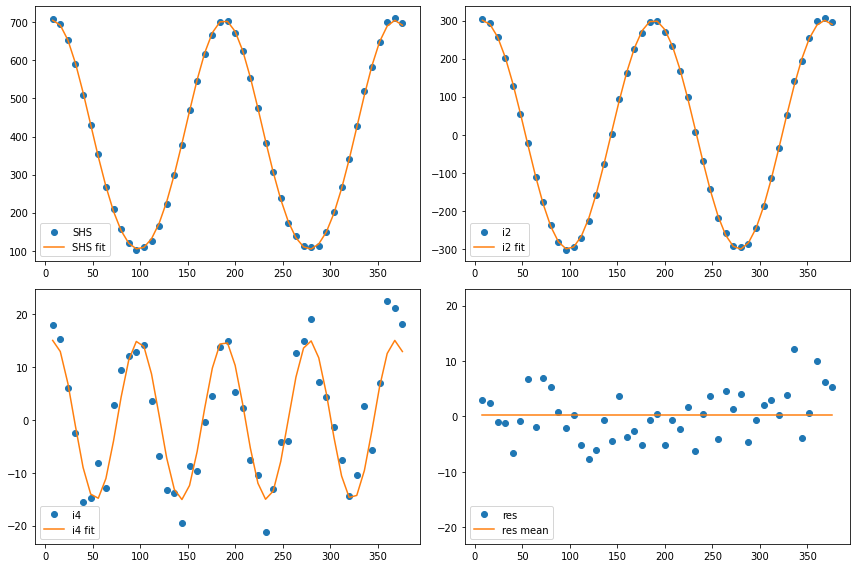

In [9]:
L_res =L_y - (i0 + i2*np.cos(2*np.pi/180*(L_x-alpha_0)) + i4*np.cos(4*np.pi/180*(L_x-alpha_0)))
# print(np.mean(L_res))
L_res_mean = [np.mean(L_res)]*len(L_res)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axes[0][0].plot(L_x,L_y, 'o' , label='SHS' )
axes[0][0].plot(L_x, (i0 + i2*np.cos(2*np.pi/180*(L_x-alpha_0)) + i4*np.cos(4*np.pi/180*(L_x-alpha_0)) ), '-', label='SHS fit' )
axes[0][0].legend(loc='best')

axes[0][1].plot(L_x, L_y - (i0+i4*np.cos(4*np.pi/180*(L_x-alpha_0))),  'o',  label='i2')
axes[0][1].plot(L_x, i2*np.cos(2*np.pi/180*(L_x-alpha_0)),  '-',  label='i2 fit')
axes[0][1].legend(loc='best')

axes[1][0].plot(L_x,L_y - (i0 + i2*np.cos(2*np.pi/180*(L_x-alpha_0)) ),  'o', label='i4')
axes[1][0].plot(L_x, i4*np.cos(4*np.pi/180*(L_x-alpha_0)),  '-',  label='i4 fit')
axes[1][0].legend(loc='best')

axes[1][1].plot(L_x,L_y - (i0 + i2*np.cos(2*np.pi/180*(L_x-alpha_0)) + i4*np.cos(4*np.pi/180*(L_x-alpha_0)) ),  'o', label='res'  )
axes[1][1].plot(L_x,L_res_mean,  label='res mean' )
axes[1][1].legend(loc='lower left')



axes[1][1].set_ylim([-23, 23])

fig.tight_layout()



# Uncertainties and Polar plot

ZetaV = -0.1776080741518694 +- 0.02123813968819996 D = 0.14771166159115498 +- 0.0019805634958792334
a, b, c 
 a= 706.1863718845525 +- 2.1237861930119317 
 b= 688.2581327852918 +- 7.106365001165126 
 c= 104.31196238409655 +- 1.3630115875528233
i0, i2, i4 
 i0= 389.65035296199596 +- 0.738911023835259 
 i2= 300.5273730424975 +- 0.5224889956474063 
 i4= 15.12800957083547 +- 0.5224889956474063


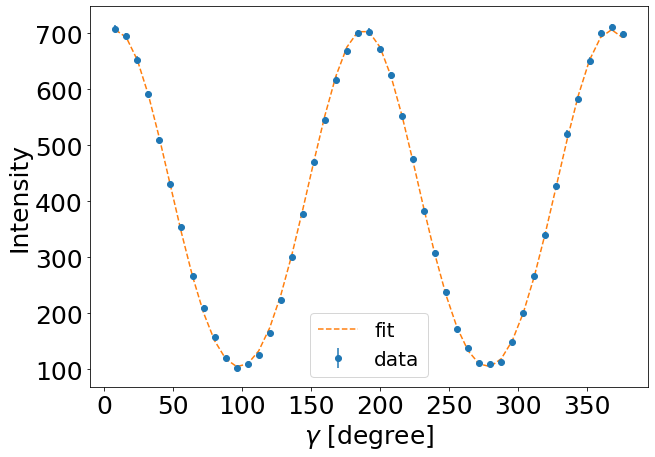

In [10]:
L_x3 = L_polarisation_angle
T = 1 # Acquisition time if you want to renormalize
L_y3 = L_intensity/T # chose which method you want to have the intensity


L_SHS_prop, L_SHS_prop_error = Alpaga.shs_module.analyse_polarization_SHS_V(L_x3, L_y3, alpha_0=8, L_intensity_error=L_intensity_error)
a, b, c, ZetaV, Depol, i0, i2, i4, alpha_0 = L_SHS_prop
a_verr, b_verr, c_verr, ZetaV_serr, Depol_serr, i0_serr, i2_serr, i4_serr = L_SHS_prop_error


#  Values and uncertainties


print('ZetaV = ' + str(ZetaV),'+-',ZetaV_serr, 'D = ' + str(Depol),'+-', Depol_serr)

print('a, b, c', '\n',
    'a=', a,'+-', np.sqrt(a_verr),'\n',
    'b=', b, '+-', np.sqrt(b_verr),'\n', 
    'c=', c ,'+-', np.sqrt(c_verr))



print('i0, i2, i4', '\n',
    'i0=', i0,'+-', i0_serr,'\n',
    'i2=', i2, '+-', i2_serr,'\n', 
    'i4=', i4 ,'+-', i4_serr)


#  Polar plot and uncertainties 

plt.figure(1, figsize=(10, 7))
plt.errorbar(L_x3, L_y3 , yerr=L_intensity_error, label='data', fmt="o")
plt.plot(L_x, shs_module.fct_polar_abc(L_x, a, b, c, alpha_0), '--', label='fit')
plt.xlabel(r'$\gamma$ [degree]', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel(r'Intensity', fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=20)
